# Classify Emotions in text with BERT NLP Model

## Step-1 Install packages

In [2]:
!pip3 uninstall keras-nightly
!pip3 uninstall -y tensorflow
!pip3 install keras==2.1.6
!pip3 install tensorflow==2.7.0
!pip3 install h5py==2.10.0

Keyring is skipped due to an exception: 'keyring.backends'
Keyring is skipped due to an exception: 'keyring.backends'
Keyring is skipped due to an exception: 'keyring.backends'
  Using cached Keras-2.1.6-py2.py3-none-any.whl (339 kB)
Keyring is skipped due to an exception: 'keyring.backends'
  Using cached tensorflow-2.7.0-cp37-cp37m-manylinux2010_x86_64.whl (489.6 MB)
  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_io_gcs_filesystem-0.27.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.4 MB)
  Using cached grpcio-1.50.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.7 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-2.0.7-py2.py

In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'2.7.0'

In [5]:
!pip install wordcloud

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached wordcloud-1.8.2.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (435 kB)


In [6]:
!pip install imbalanced-learn

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)
  Using cached scikit_learn-1.0.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.8 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1


In [20]:
!pip install transformers

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached transformers-4.24.0-py3-none-any.whl (5.5 MB)
  Using cached tokenizers-0.13.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.6 MB)
  Using cached huggingface_hub-0.11.0-py3-none-any.whl (182 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.1
    Uninstalling packaging-20.1:
      Successfully uninstalled packaging-20.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytest-astropy 0.8.0 requires pytest-cov>=2.0, which is not installed.
pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which is not installed.
sagemaker 2.116.0 requires importlib-metadata<5.0,>=1.4.0, but you have importlib-metadata 5.0.0 which is incompatible.
docker-compose 1.29.2 requires PyYAML<6,>=3.10, b

## Import Required Packages

In [7]:
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
!pip install contractions
import contractions
import re
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Keyring is skipped due to an exception: 'keyring.backends'
  Using cached contractions-0.1.73-py2.py3-none-any.whl (8.7 kB)
  Using cached textsearch-0.0.24-py2.py3-none-any.whl (7.6 kB)
  Using cached anyascii-0.3.1-py3-none-any.whl (287 kB)
  Using cached pyahocorasick-1.4.4-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (106 kB)


In [8]:
train_data = pd.read_csv('emotions-dataset-for-nlp/train.txt', names=['text', 'emotion'], sep=';')
val_data = pd.read_csv('emotions-dataset-for-nlp/val.txt', names=['text', 'emotion'], sep=';')
test_data = pd.read_csv('emotions-dataset-for-nlp/test.txt', names=['text', 'emotion'], sep=';')
train_data.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [9]:
train_data.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


### Data preprocessing

In [10]:
data = {'Train Data': train_data, 'Validation Data': val_data, 'Test Data': test_data}
for temp in data:
    print(temp)
    print(data[temp].isnull().sum())
    print('*'*20)

Train Data
text       0
emotion    0
dtype: int64
********************
Validation Data
text       0
emotion    0
dtype: int64
********************
Test Data
text       0
emotion    0
dtype: int64
********************


Class Distribution in Train, val and test dataset

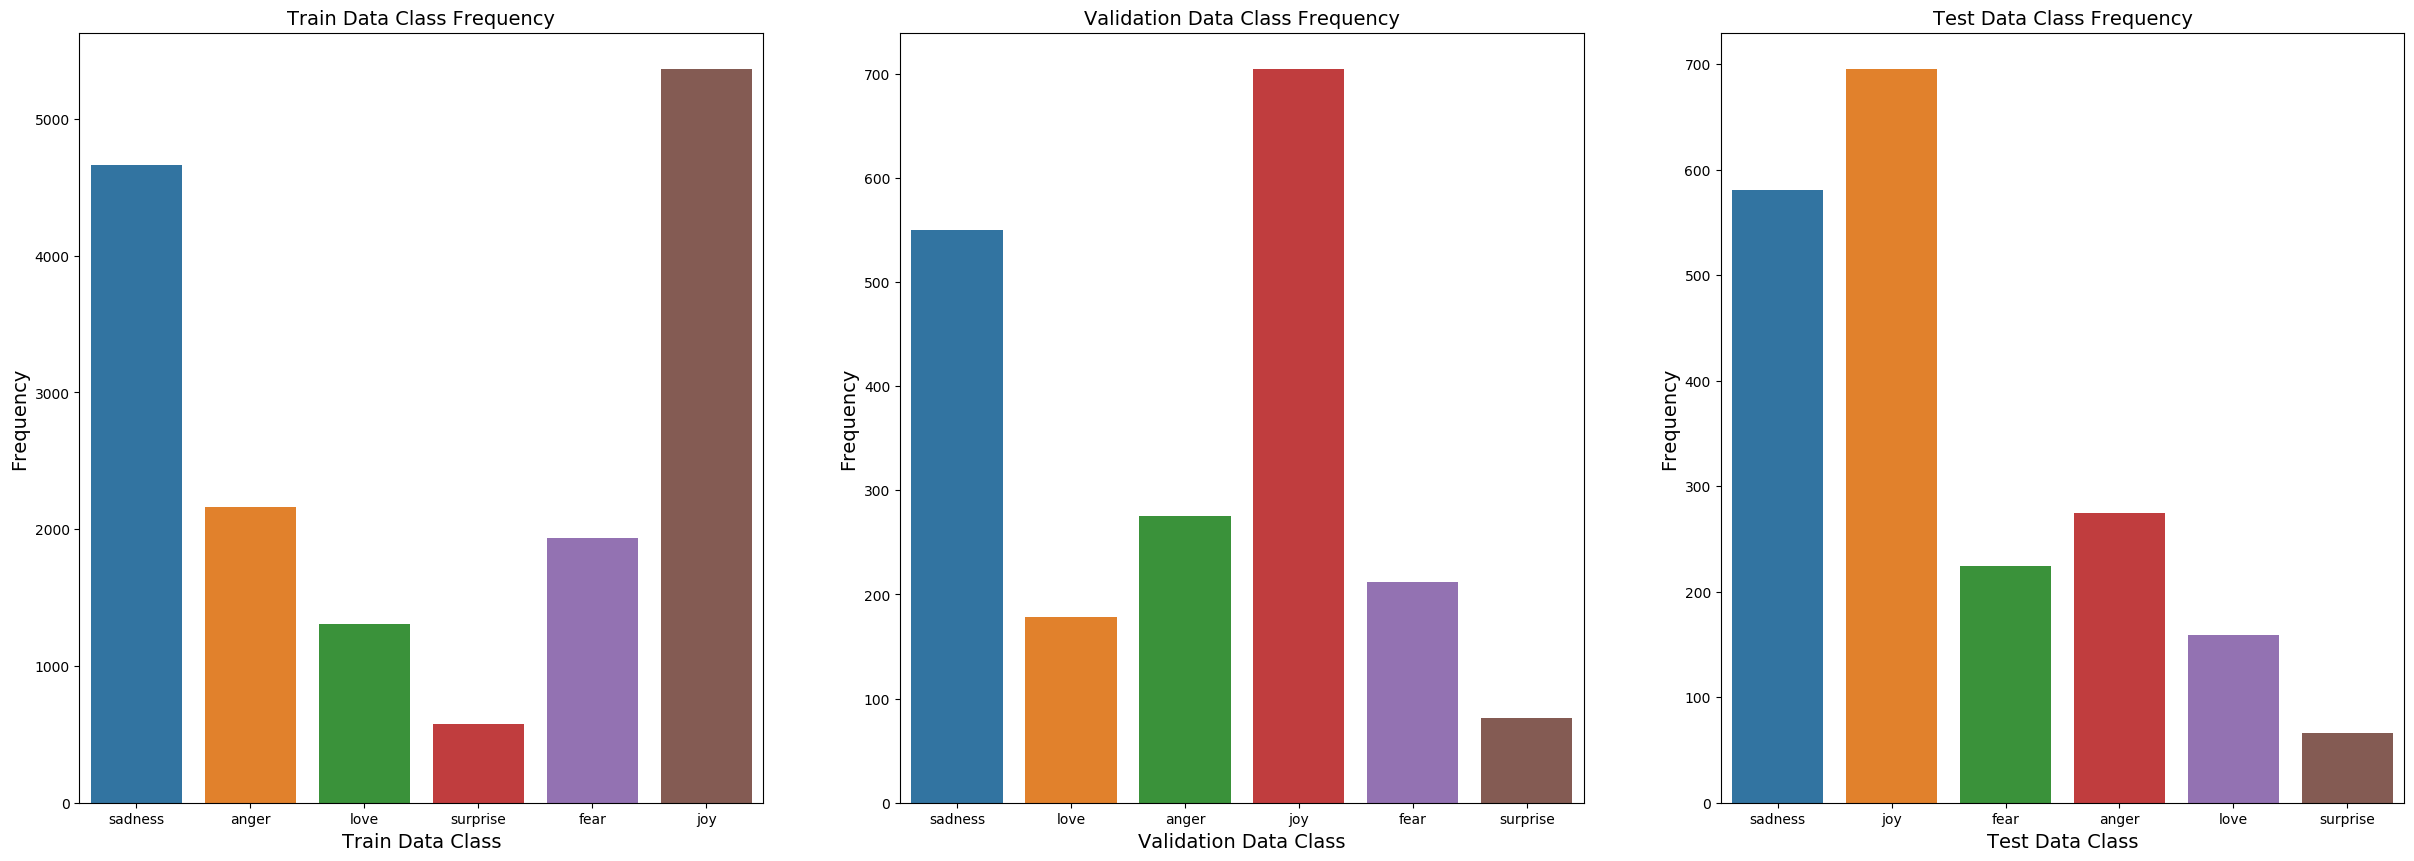

In [11]:
bar, ax = plt.subplots(1,3, figsize=(30, 10))
for index, temp in enumerate(data):
    sns.countplot(ax = ax[index],x = 'emotion', data = data[temp])
    ax[index].set_title(temp+' Class Frequency', size=14)
    ax[index].set_ylabel('Frequency', size=14)
    ax[index].set_xlabel(temp+' Class', size=14)
    
plt.show()

Word Cloud to get most frequent words.

In [12]:
def plot_cloud(wordcloud, temp):
    plt.figure(figsize=(10, 10))
    plt.title(temp+' Word Cloud', size = 16)
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [13]:
for temp in data:
    temp_text = ' '.join([sentence for sentence in data[temp].text])
    wordcloud = WordCloud(width = 600, height = 600).generate(temp_text)
    plot_cloud(wordcloud, temp)


## Data Processing, Label Creation and Seentence Listing

In [14]:
def preprocess(sentence):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    sentence = re.sub('[^A-z]', ' ', sentence)
    negative = ['not', 'neither', 'nor', 'but', 'however', 'although', 'nonetheless', 'despite', 'except',
                        'even though', 'yet']
    stop_words = [z for z in stop_words if z not in negative]
    preprocessed_tokens = [lemmatizer.lemmatize(contractions.fix(temp.lower())) for temp in sentence.split() if temp not in stop_words] #lemmatization
    return ' '.join([x for x in preprocessed_tokens]).strip()

In [15]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [16]:
train_data['text'] = train_data['text'].apply(lambda x: preprocess(x))
val_data['text'] = val_data['text'].apply(lambda x: preprocess(x))
test_data['text'] = test_data['text'].apply(lambda x: preprocess(x))

Note: As class imbalanced is evident, RandomOverSampler is used to add data(repetition) to all classes except highest frequency class.

In [17]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
train_x, train_y = ros.fit_resample(np.array(train_data['text']).reshape(-1, 1), np.array(train_data['emotion']).reshape(-1, 1))
train = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['text', 'emotion'])

Applying OneHotEncoder on target of all dataset

In [18]:
from sklearn import preprocessing
le = preprocessing.OneHotEncoder()
y_train= le.fit_transform(np.array(train['emotion']).reshape(-1, 1)).toarray()
y_test= le.fit_transform(np.array(test_data['emotion']).reshape(-1, 1)).toarray()
y_val= le.fit_transform(np.array(val_data['emotion']).reshape(-1, 1)).toarray()

## Encoding

There is a very helpful function called encode_plus provided in the Tokenizer class. It can seamlessly perform the following operations:

* Tokenize the text and Add special tokens - [CLS] and [SEP]
* create input IDs
* Pad the sentences to a maximum length
* Create attention masks for the above PAD tokens

**Note**: RoBERTa uses byte-level Byte-Pair Encoding (BPE) in contrast to BERT’s character-level BPE.

In [21]:
from transformers import RobertaTokenizerFast
tokenizer = RobertaTokenizerFast.from_pretrained("roberta-base")

In [22]:
def roberta_encode(data,maximum_length) :
  input_ids = []
  attention_masks = []
  

  for i in range(len(data.text)):
      encoded = tokenizer.encode_plus(
        
        data.text[i],
        add_special_tokens=True,
        max_length=maximum_length,
        pad_to_max_length=True,
        
        return_attention_mask=True,
        
      )
      
      input_ids.append(encoded['input_ids'])
      attention_masks.append(encoded['attention_mask'])
  return np.array(input_ids),np.array(attention_masks)

In [23]:
max_len = max([len(x.split()) for x in train_data['text']])
train_input_ids,train_attention_masks = roberta_encode(train, max_len)
test_input_ids,test_attention_masks = roberta_encode(test_data, max_len)
val_input_ids,val_attention_masks = roberta_encode(val_data, max_len)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2310: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


## Create Model

**How RoBERTa is better than BERT ??**

Changes in Pre-Training:
* without NSP objective
* with dynamic mask generation

Changes in Data:
* Trained on more data (16GB BERT vs 160GB RoBERTa)
* Trained on large batches
Note: Pre-requistics is to go through BERT

References:
* Bert: https://arxiv.org/pdf/1810.04805.pdf
* The Illustrated BERT, ELMo, and co. (How NLP Cracked Transfer Learning): http://jalammar.github.io/illustrated-bert/
* The Illustrated Transformer: https://jalammar.github.io/illustrated-transformer/
* Attention Is All You Need: https://arxiv.org/pdf/1706.03762.pdf
* Query,key,value vector: https://stats.stackexchange.com/questions/421935/what-exactly-are-keys-queries-and-values-in-attention-mechanisms

In [24]:
def create_model(bert_model, max_len):
    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')

    output = bert_model([input_ids,attention_masks])
    output = output[1]

    output = tf.keras.layers.Dense(6, activation='softmax')(output)
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    model.compile(Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [25]:
from transformers import TFRobertaModel
roberta_model = TFRobertaModel.from_pretrained('roberta-base')

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [26]:
model = create_model(roberta_model, max_len)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 43)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 43)]         0           []                               
                                                                                                  
 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  124645632  ['input_1[0][0]',                
 el)                            thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 43,                                            

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## Model Training

In [ ]:
history = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_val), epochs=4,batch_size=100)

Epoch 1/4
 19/322 [>.............................] - ETA: 1:03:22 - loss: 1.8033 - accuracy: 0.1626